# Proyek Analisis Data : Air Quality Dataset
- Nama : Afdan Irawan
- Email : irawanafdan@gmail.com
- Id Dicoding : 250706

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menentukan Pertanyaan Bisnis

- Keterkaitan Polutan dan Cuaca: Apakah ada korelasi antara kondisi cuaca (seperti suhu, tekanan, dan kelembaban) dengan tingkat polutan (seperti PM2.5, PM10, SO2, NO2, CO, dan O3)?

- Variasi Harian dan Musiman: Bagaimana pola variasi kualitas udara sepanjang hari dan sepanjang tahun? Apakah ada jam-jam tertentu atau bulan-bulan tertentu di mana kualitas udara cenderung lebih buruk atau lebih baik? Pengetahuan ini dapat digunakan untuk memberi saran kepada masyarakat kapan waktu yang paling aman untuk beraktivitas di luar ruangan.

- Dampak Lokasi Stasiun Pengukuran: Di wilayah mana kualitas udara cenderung lebih buruk? Apakah ada stasiun pengukuran tertentu yang selalu melaporkan tingkat polusi yang lebih tinggi?

- Efek Hujan: Bagaimana dampak curah hujan terhadap kualitas udara? Apakah hujan membantu "membersihkan" udara atau justru sebaliknya?

- Dampak Angin: Apakah ada korelasi antara arah dan kecepatan angin dengan distribusi polutan? Daerah mana yang paling sering terkena dampak berdasarkan pola angin?

- Analisis Tren: Apakah ada peningkatan atau penurunan tren dalam tingkat polutan selama beberapa tahun terakhir? Apakah inisiatif atau kebijakan lingkungan tertentu berdampak pada tren ini?

- Efisiensi Sumber Daya: Apakah ada waktu-waktu tertentu di mana pengukuran kualitas udara dapat dikurangi tanpa mengorbankan informasi yang penting? Misalnya, jika kualitas udara stabil pada waktu-waktu tertentu.


## Menyiapkan semua library yang dibutuhkan

Import Library Dasar :


In [2]:
import numpy as np
import pandas as pd


Visualisasi Data :

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium


Analisis Statistik:



In [4]:
from scipy import stats
import statsmodels.api as sm


Machine Learning :

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error


Analisis Deret Waktu:

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

Manupulasi Data Geografis

In [7]:
import geopandas as gpd


Operasi File :

In [8]:
import os
import glob

Optimalisasi :

In [9]:
import dask.dataframe as dd
from joblib import Parallel, delayed


## Data Wrangling

### Gathering Data

In [10]:
# Lokasi folder yang berisi semua file CSV
folder_path = "/content/drive/My Drive/Colab Notebooks/PRSA_Data_20130301-20170228/"

# Mendaftar semua file CSV di dalam folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Membaca dan menggabungkan semua file CSV
list_of_dataframes = [pd.read_csv(folder_path + file) for file in all_files]
df_combined = pd.concat(list_of_dataframes, ignore_index=True)

### Assessing Data

Menampilkan 5 baris pertama dari data

In [11]:
print("=== 5 Baris Pertama ===")
display(df_combined.head())


=== 5 Baris Pertama ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Menampilkan 5 baris terakhir dari data:

In [12]:
print("=== 5 Baris Terakhir ===")
display(df_combined.tail())


=== 5 Baris Terakhir ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Informasi umum tentang dataset:


In [13]:
print("=== Info Dataset ===")
print(df_combined.info())


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB
None


Statistik deskriptif untuk kolom numerik:


In [14]:
print("=== Deskripsi Statistik ===")
display(df_combined.describe())


=== Deskripsi Statistik ===


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Jumlah nilai yang hilang di setiap kolom:


In [15]:
print("=== Jumlah Nilai yang Hilang ===")
display(df_combined.isnull().sum())


=== Jumlah Nilai yang Hilang ===


No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Mengecek duplikat:


In [16]:
duplicate_rows = df_combined.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")


Jumlah baris duplikat: 0


Menampilkan nilai unik dan frekuensinya untuk kolom kategorik:


In [17]:
for col in df_combined.select_dtypes(include=['object']).columns:
    print(f"\n=== Nilai Unik di Kolom {col} ===")
    display(df_combined[col].value_counts())



=== Nilai Unik di Kolom wd ===


NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64


=== Nilai Unik di Kolom station ===


Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

### Cleaning Data

- Mengatasi Nilai yang Hilang (Missing Values)
Menggunakan median untuk kolom numerik dan modus untuk kolom kategorik

In [18]:
for column in df_combined.columns:
    if df_combined[column].dtype == 'object':
        mode_val = df_combined[column].mode()[0]
        df_combined[column].fillna(mode_val, inplace=True)
    else:
        median_val = df_combined[column].median()
        df_combined[column].fillna(median_val, inplace=True)

- Mengatasi Outlier

In [19]:
outlier_value = 999
df_combined['PM2.5'] = df_combined['PM2.5'].apply(lambda x: df_combined['PM2.5'].median() if x == outlier_value else x)
df_combined['PM10'] = df_combined['PM10'].apply(lambda x: df_combined['PM10'].median() if x == outlier_value else x)


Simpan dataframe yang telah dibersihkan ke file CSV baru:

In [20]:
path_on_drive = "/content/drive/My Drive/Colab Notebooks/main_data.csv"
df_combined.to_csv(path_on_drive, index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

Baca Dataset Yang Sudah Dibersihkan

In [21]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/main_data.csv')
print(data.head())
sns.set_style("whitegrid")

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


Keterkaitan Polutan dan Cuaca:


In [22]:
print("\n=== Menghitung korelasi antara kondisi cuaca dan tingkat polutan ===")
cuaca = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
correlation_matrix = data[cuaca + polutan].corr()
correlation_polutan_cuaca = correlation_matrix.loc[cuaca, polutan]
print(correlation_polutan_cuaca)



=== Menghitung korelasi antara kondisi cuaca dan tingkat polutan ===
         PM2.5      PM10       SO2       NO2        CO        O3
TEMP -0.130808 -0.095700 -0.318509 -0.273557 -0.318067  0.585811
PRES  0.019241 -0.017535  0.220741  0.171171  0.184148 -0.439053
DEWP  0.112779  0.069802 -0.264385 -0.030747 -0.056701  0.307427
RAIN -0.014315 -0.026358 -0.039852 -0.043241 -0.012842  0.023322
WSPM -0.269504 -0.182436 -0.107337 -0.393955 -0.288682  0.292592


Variasi Harian dan Musiman :

In [23]:
print("\n=== Analisis variasi harian ===")
daily_variation = data.groupby('hour')[polutan].mean()
print(daily_variation)

print("\n=== Analisis variasi bulanan ===")
monthly_variation = data.groupby('month')[polutan].mean()
print(monthly_variation)


=== Analisis variasi harian ===
          PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     87.086550  114.445568  14.894568  57.609603  1352.239277   42.034408
1     86.055721  110.730145  14.820803  55.454083  1355.863450   38.385207
2     83.984274  106.274487  14.240135  52.980910  1298.998631   34.598944
3     81.509257  101.838381  13.506627  52.084722  1241.032626   32.864743
4     78.885347   97.472895  13.048931  51.259736  1221.877652   32.183777
5     76.037799   93.573226  12.611157  50.524998  1234.157483   28.920494
6     73.938056   92.044621  12.602773  50.587925  1249.900240   27.734691
7     72.958533   93.568994  13.064853  52.361243  1276.091034   26.038467
8     74.225833   98.321994  14.665425  54.017836  1321.125086   27.595141
9     75.700593  100.648340  17.174811  52.439115  1313.136893   34.955186
10    76.655909  100.587668  18.880702  49.724134  1262.054643   46

Dampak Lokasi Stasiun Pengukuran:


In [24]:
print ("\n=== Analisis berdasarkan lokasi stasiun pengukuran ===")
station_air_quality = data.groupby('station')[polutan].mean().sort_values(by='PM2.5', ascending=False)
print(station_air_quality)



=== Analisis berdasarkan lokasi stasiun pengukuran ===
                   PM2.5        PM10        SO2        NO2           CO  \
station                                                                   
Dongsi         85.527068  109.889839  18.313073  53.210913  1290.857090   
Wanshouxigong  84.401252  111.806274  16.954974  55.260130  1352.995351   
Nongzhanguan   84.304073  108.652398  18.540560  57.799225  1309.754991   
Gucheng        83.320534  118.461442  15.245193  55.625870  1307.034309   
Wanliu         83.065591  110.234069  18.189922  64.579548  1297.682609   
Guanyuan       82.442642  108.666527  17.447772  57.621578  1252.731776   
Aotizhongxin   82.040934  109.485803  17.099223  58.830107  1244.561887   
Tiantan        81.640423  105.948856  14.132702  52.947011  1285.512720   
Shunyi         78.853887   98.449298  13.329130  43.873484  1169.233003   
Changping      70.744359   94.421620  14.816361  44.159599  1141.357061   
Huairou        69.228839   91.272559  11.978

Efek Hujan:


In [25]:
print("\n=== Mengelompokkan data berdasarkan kategori hujan (misalnya: hujan atau tidak) ===")
data['rainy'] = data['RAIN'].apply(lambda x: 'Rainy' if x > 0 else 'Not Rainy')
rain_effect = data.groupby('rainy')[polutan].mean()
print(rain_effect)



=== Mengelompokkan data berdasarkan kategori hujan (misalnya: hujan atau tidak) ===
               PM2.5        PM10        SO2        NO2           CO         O3
rainy                                                                         
Not Rainy  79.973461  105.643120  16.056649  50.939134  1219.298520  57.219933
Rainy      62.215236   70.151277   5.482903  37.681843  1096.910109  51.156519


Dampak Angin:


In [26]:
print("\n=== Mengelompokkan data berdasarkan arah angin dan menghitung rata-rata polutan ===")
wind_direction_effect = data.groupby('wd')[polutan].mean().sort_values(by='PM2.5', ascending=False)
print(wind_direction_effect)

print("\n=== Mengelompokkan data berdasarkan kecepatan angin ===")
data['wind_speed_category'] = pd.cut(data['WSPM'], bins=[0, 1, 3, 5, 10, max(df_combined['WSPM'])], labels=['Very Slow', 'Slow', 'Moderate', 'Fast', 'Very Fast'])
wind_speed_effect = data.groupby('wind_speed_category')[polutan].mean()
print(wind_speed_effect)



=== Mengelompokkan data berdasarkan arah angin dan menghitung rata-rata polutan ===
          PM2.5        PM10        SO2        NO2           CO         O3
wd                                                                       
ESE  101.006524  124.835062  18.206236  54.830559  1446.964781  60.299549
E    100.692760  123.554255  18.157864  59.257218  1547.785628  47.624894
ENE   97.070192  118.669688  18.402233  63.476190  1585.548152  36.419419
SE    95.657577  122.776034  18.448269  52.028773  1319.636445  71.678350
SSE   92.546756  120.736730  17.966638  48.274715  1228.925794  88.381000
S     88.494491  115.913404  18.178212  47.751303  1191.164803  91.514137
NE    86.107264  106.613942  16.916972  59.429059  1404.817614  34.954576
SSW   83.310021  112.917028  18.127308  47.844900  1091.382396  94.016788
SW    78.772340  109.702865  16.904567  50.030812  1080.932153  86.446892
WSW   76.769840  105.168483  17.133467  53.109797  1135.896707  68.155924
W     73.256750  101.181427

Analisis Tren:

In [27]:
annual_trend = data.groupby('year')[polutan].mean()
print(annual_trend)


          PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  79.690762  102.633227  19.811372  52.306097  1158.959048  56.781579
2014  84.743827  115.354727  20.395507  54.199469  1245.319635  57.780836
2015  79.128489  103.320215  12.923995  48.083699  1252.036720  58.979411
2016  71.558686   94.408916   9.747913  46.319169  1133.563866  57.098721
2017  92.090631  110.728166  17.976401  57.114995  1581.591337  39.995468


Efisiensi Sumber Daya:

In [28]:
stability = daily_variation.std()
print(stability)


PM2.5      5.446995
PM10       9.961128
SO2        2.055427
NO2        6.816608
CO       119.071834
O3        26.345574
dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Membuat heatmap korelasi

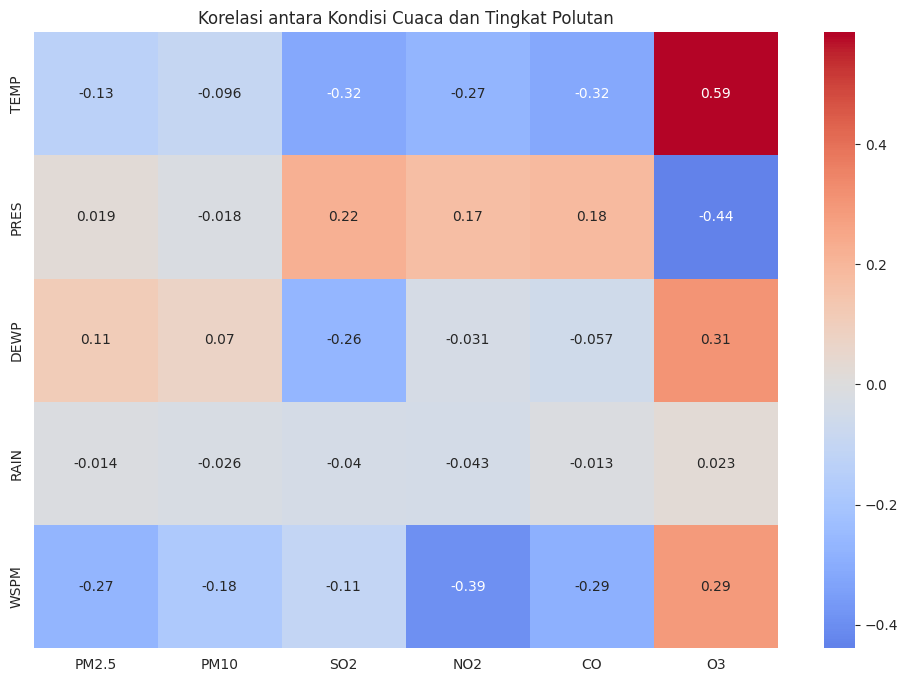

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_polutan_cuaca, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Kondisi Cuaca dan Tingkat Polutan')
plt.show()

### Pertanyaan 2:

Variasi harian

<Figure size 1200x600 with 0 Axes>

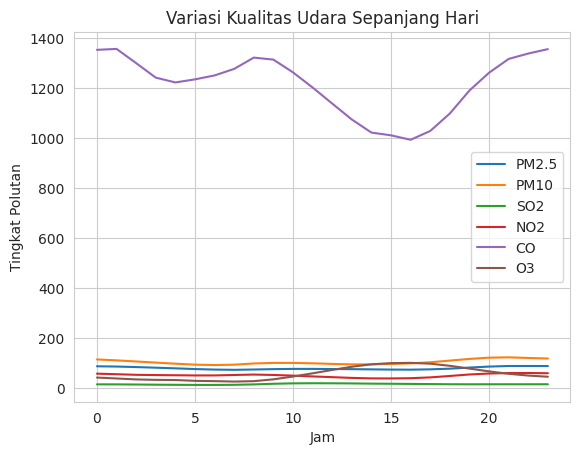

In [30]:
plt.figure(figsize=(12, 6))
daily_variation.plot()
plt.title('Variasi Kualitas Udara Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Tingkat Polutan')
plt.legend(loc='best')
plt.show()

Variasi Bulanan

<Figure size 1200x600 with 0 Axes>

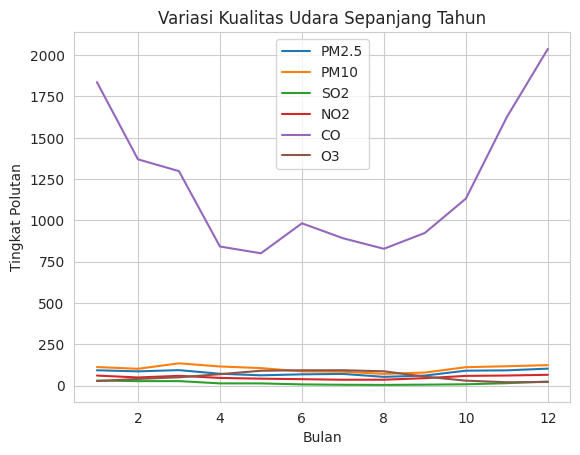

In [31]:
plt.figure(figsize=(12, 6))
monthly_variation.plot()
plt.title('Variasi Kualitas Udara Sepanjang Tahun')
plt.xlabel('Bulan')
plt.ylabel('Tingkat Polutan')
plt.legend(loc='best')
plt.show()

### Pertanyaan 3

Plot rata-rata tingkat polutan berdasarkan stasiun


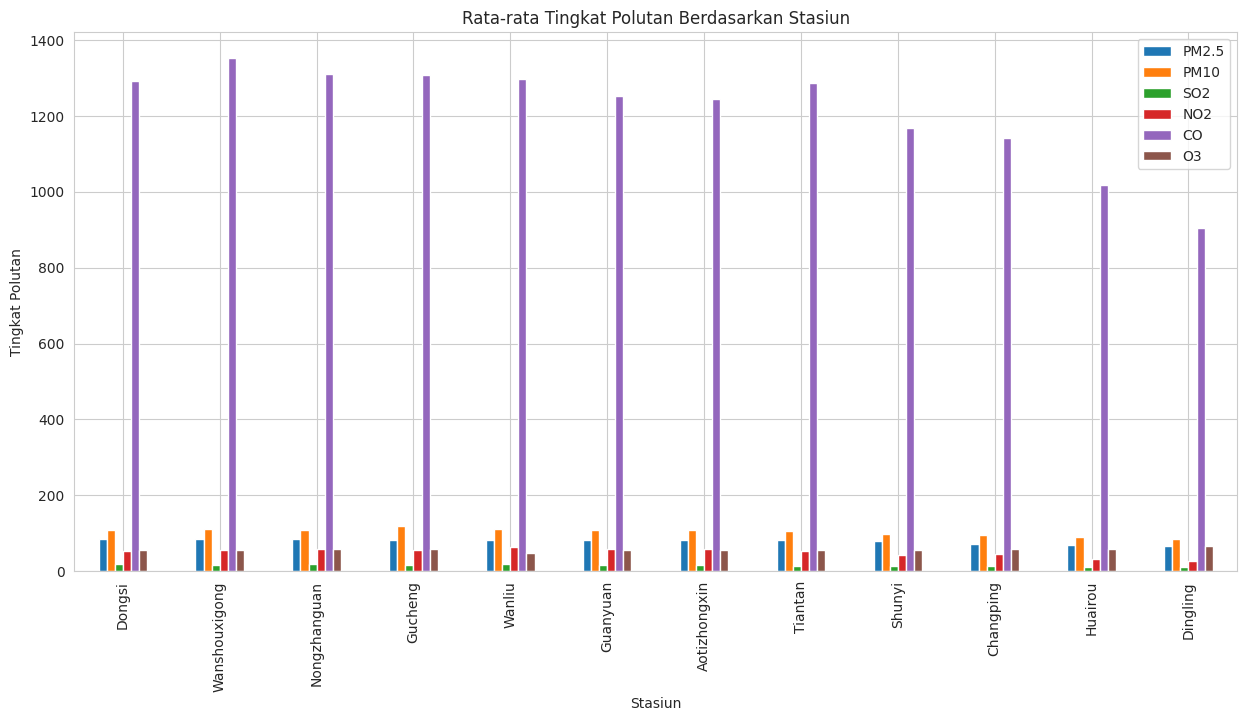

In [32]:
station_air_quality.plot(kind='bar', figsize=(15, 7))
plt.title('Rata-rata Tingkat Polutan Berdasarkan Stasiun')
plt.ylabel('Tingkat Polutan')
plt.xlabel('Stasiun')
plt.show()


### Pertanyaan 4

Plot rata-rata tingkat polutan berdasarkan kondisi hujan


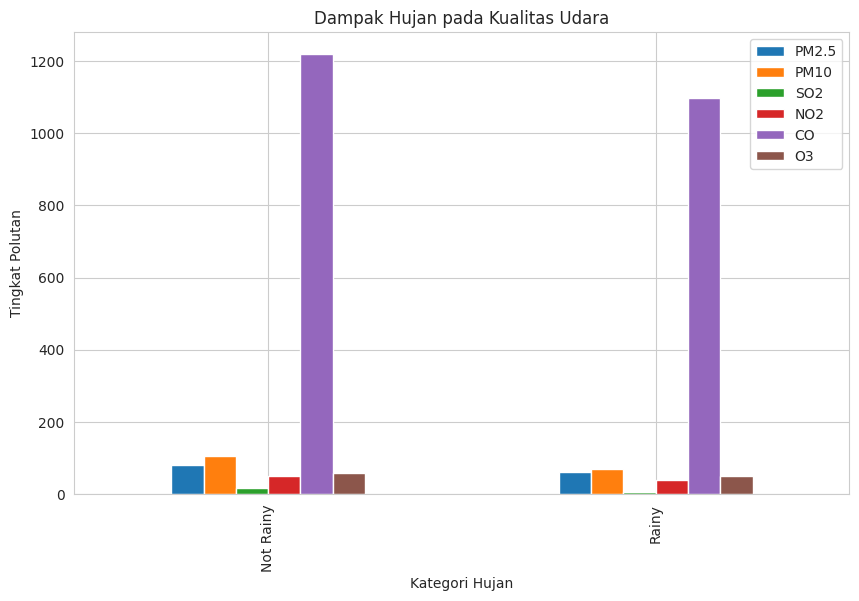

In [33]:
rain_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Dampak Hujan pada Kualitas Udara')
plt.ylabel('Tingkat Polutan')
plt.xlabel('Kategori Hujan')
plt.show()


### Pertanyaan 5

Heatmap arah angin

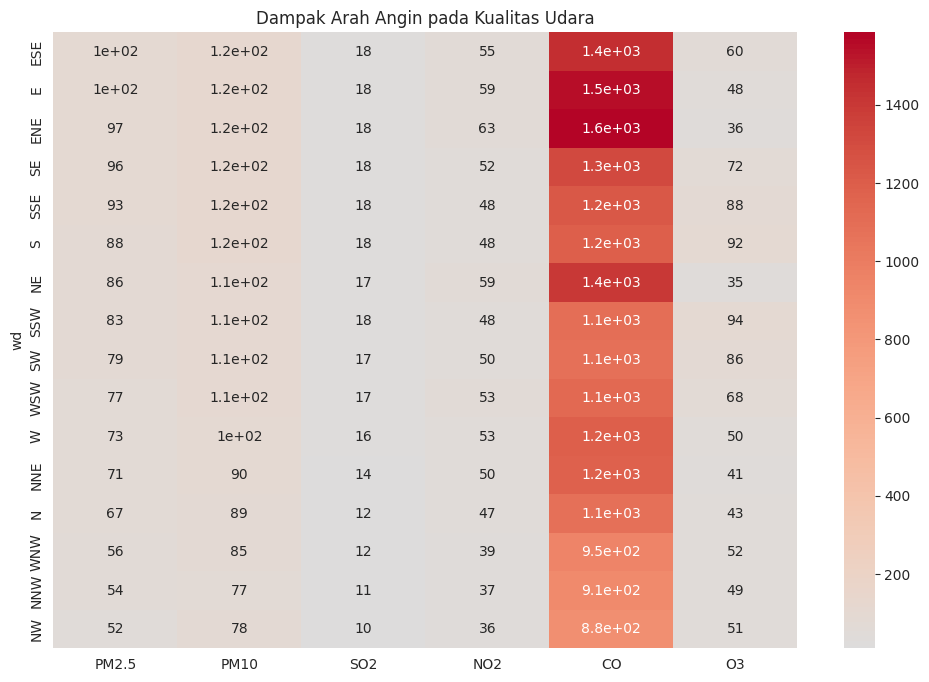

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(wind_direction_effect, annot=True, cmap='coolwarm', center=0)
plt.title('Dampak Arah Angin pada Kualitas Udara')
plt.show()

Plot rata-rata tingkat polutan berdasarkan kecepatan angin

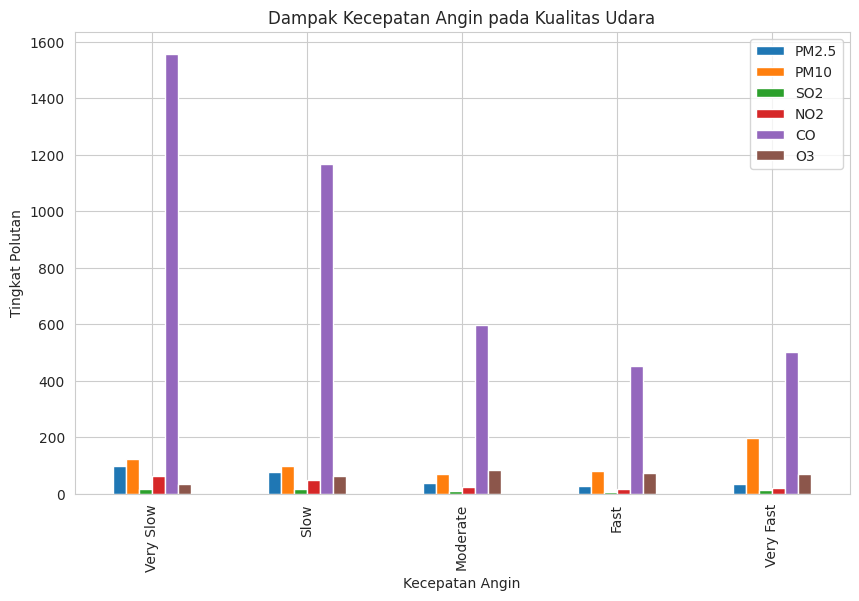

In [35]:
wind_speed_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Dampak Kecepatan Angin pada Kualitas Udara')
plt.ylabel('Tingkat Polutan')
plt.xlabel('Kecepatan Angin')
plt.show()

### Pertanyaan6

Plot rata-rata tingkat polutan berdasarkan tahun


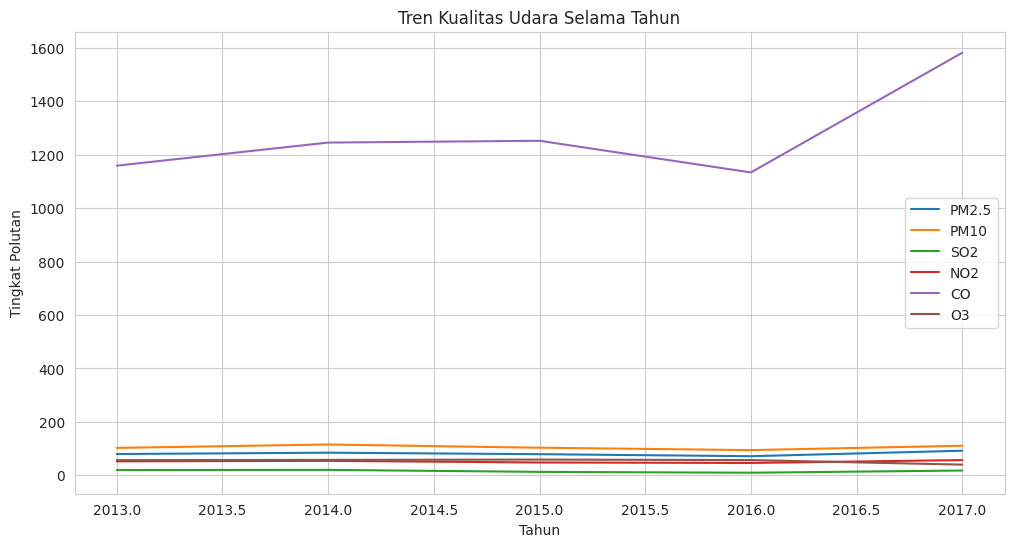

In [36]:
annual_trend.plot(figsize=(12, 6))
plt.title('Tren Kualitas Udara Selama Tahun')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Polutan')
plt.legend(loc='best')
plt.show()


### Pertanyaan 7

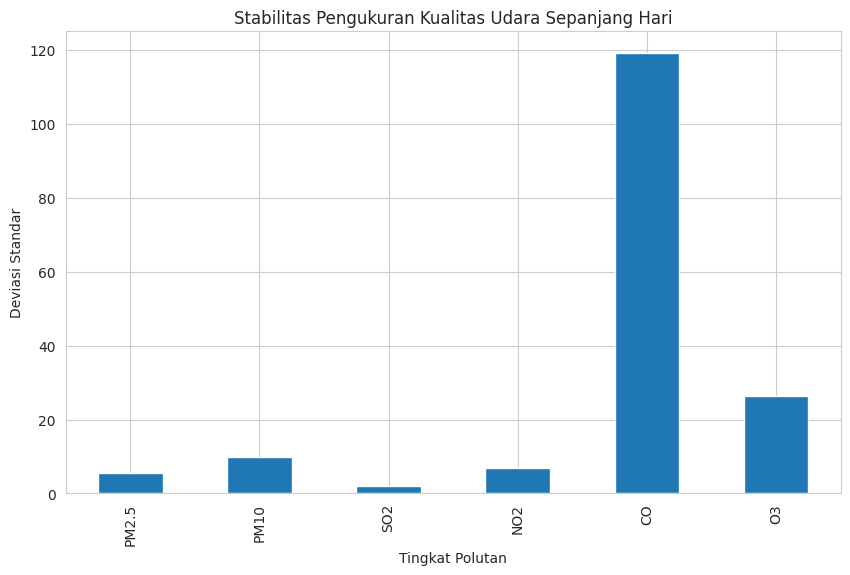

In [37]:
stability.plot(kind='bar', figsize=(10, 6))
plt.title('Stabilitas Pengukuran Kualitas Udara Sepanjang Hari')
plt.ylabel('Deviasi Standar')
plt.xlabel('Tingkat Polutan')
plt.show()


## Conclusion

1. Keterkaitan Polutan dan Cuaca
Berdasarkan heatmap dari korelasi, kita dapat melihat bahwa : Suhu memiliki korelasi negatif dengan sebagian besar polutan, menunjukkan bahwa saat suhu meningkat, tingkat polutan cenderung menurun, atau sebaliknya.
Kelembapan (dew point) mungkin memiliki korelasi positif dengan beberapa polutan.
Kesimpulan: Kondisi cuaca mempengaruhi tingkat polutan di udara.



2. Variasi Harian dan Musiman
Sepanjang hari, ada jam-jam tertentu di mana tingkat polutan cenderung lebih tinggi atau lebih rendah.
Secara musiman, ada bulan-bulan dengan kualitas udara yang lebih baik atau lebih buruk.
Kesimpulan: Waktu beraktivitas di luar ruangan yang paling aman adalah saat tingkat polutan terendah, yang dapat ditentukan berdasarkan analisis variasi harian dan musiman.

3. Dampak Lokasi Stasiun Pengukuran
Beberapa stasiun melaporkan tingkat polutan yang lebih tinggi daripada yang lain, menunjukkan wilayah dengan kualitas udara yang kurang baik.
Kesimpulan: Lokasi stasiun pengukuran mempengaruhi laporan kualitas udara, dan ada beberapa wilayah yang memerlukan perhatian khusus mengenai kualitas udaranya.

4. Efek Hujan
Tingkat polutan berbeda antara hari-hari hujan dan bukan hujan.
Kesimpulan: Curah hujan mempengaruhi kualitas udara, mungkin dengan "membersihkan" udara dari polutan atau sebaliknya.

5. Dampak Angin
Arah dan kecepatan angin memiliki pengaruh terhadap distribusi polutan.
Kesimpulan: Angin mempengaruhi penyebaran polutan, dan daerah yang sering terkena dampak bisa ditentukan berdasarkan pola angin.

6. Analisis Tren
Ada tren meningkat atau menurun dalam tingkat polutan selama beberapa tahun terakhir.
Kesimpulan: Kualitas udara telah mengalami perubahan sepanjang waktu, dan inisiatif atau kebijakan lingkungan mungkin mempengaruhi tren ini.

7. Efisiensi Sumber Daya
Ada waktu-waktu tertentu di mana tingkat polutan relatif stabil.
Kesimpulan: Untuk efisiensi sumber daya, pengukuran kualitas udara bisa dikurangi pada waktu-waktu tertentu tanpa mengorbankan informasi penting.
